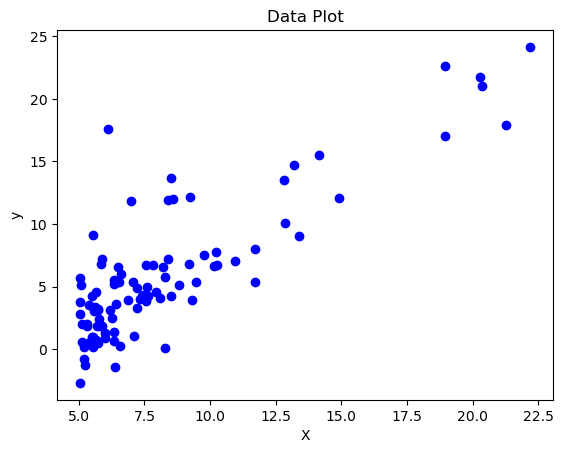

Coefficients from Normal Equation: [-3.89578088  1.19303364]


In [82]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import random

data = np.loadtxt(f'{os.getcwd()}/data2.txt', delimiter=",")
seed = 42
np.random.seed(seed)
random.seed(seed)
X = data[:, 0]
y = data[:, 1]

plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Plot')
plt.show()

X_b = np.c_[np.ones((len(X), 1)), X]

# Normal equation: theta = (X^T * X)^(-1) * X^T * y
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"Coefficients from Normal Equation: {theta_normal}")

def compute_mse(X, y, theta):
    return np.mean((X.dot(theta) - y.reshape(-1, 1))**2)

def batch_gradient_descent(X, y, learning_rate, n_iterations, threshold=1e-6):
    m = len(y)
    np.random.seed(seed)
    theta = np.random.randn(2, 1) 
    mse_list = []
    
    
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y.reshape(-1, 1))
        theta = theta - learning_rate * gradients
        mse = compute_mse(X, y, theta)
        mse_list.append(mse)
        if iteration > 0 and abs(mse_list[-1] - mse_list[-2]) < threshold:
            break
        
    return theta, mse_list

def stochastic_gradient_descent(X, y, learning_rate, n_epochs, threshold=1e-6):
    m = len(y)
    theta = np.random.randn(2, 1)
    mse_list = []
    
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1].reshape(-1, 1)
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            mse = compute_mse(X, y, theta)
            mse_list.append(mse)
            if len(mse_list) > 1 and abs(mse_list[-1] - mse_list[-2]) < threshold:
                break
                
    return theta, mse_list


Batch Coefficients: [[-0.92299071]
 [ 0.89758766]]
Time: 0.018213987350463867


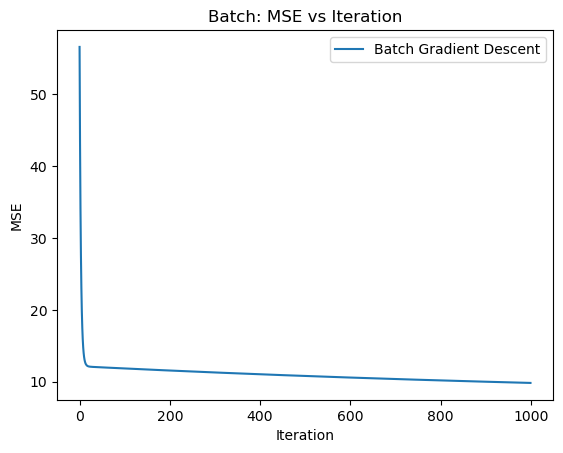

In [83]:

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)


learning_rate = 0.001  
n_iterations = 1000
n_epochs = 10

start_time = time.time()
theta_batch, mse_batch = batch_gradient_descent(X_train, y_train, learning_rate, n_iterations)
end_time = time.time()
total_time = end_time - start_time
print(f"Batch Coefficients: {theta_batch}")
print(f"Time: {total_time}")
plt.plot(mse_batch, label='Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Batch: MSE vs Iteration')
plt.show()

Stochastic Coefficients: [[-0.7681066 ]
 [ 0.72177628]]
Time: 0.0248260498046875


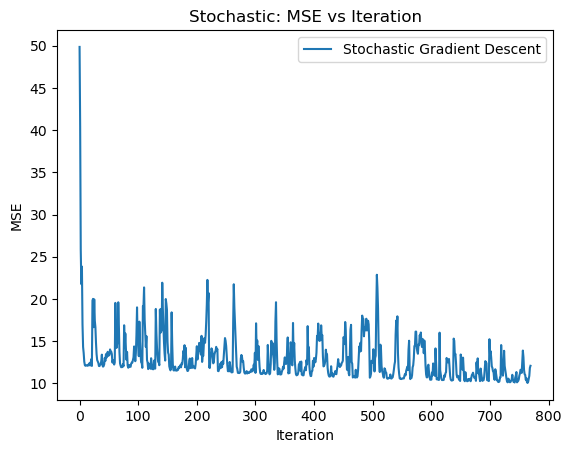

In [84]:
start_time = time.time()
theta_stochastic, mse_stochastic = stochastic_gradient_descent(X_train, y_train, learning_rate, n_epochs)
end_time = time.time()
total_time = end_time - start_time
print(f"Stochastic Coefficients: {theta_stochastic}")
print(f"Time: {total_time}")


plt.plot(mse_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Stochastic: MSE vs Iteration')
plt.show()




In [85]:
mse_test_batch = compute_mse(X_test, y_test, theta_batch)
mse_test_stochastic = compute_mse(X_test, y_test, theta_stochastic)

print(f"MSE - Batch Gradient Descent: {mse_test_batch:.2f}")
print(f"MSE - Stochastic Gradient Descent: {mse_test_stochastic:.2f}")

MSE - Batch Gradient Descent: 13.43
MSE - Stochastic Gradient Descent: 15.37


As shown above, the Batch Gradient Descent is better in its speed of convergence, converging and being stable throughout. Furthermore, the batch is also better in terms of accuracy, with a lower MSE in the same amount of iterations, although they are close.

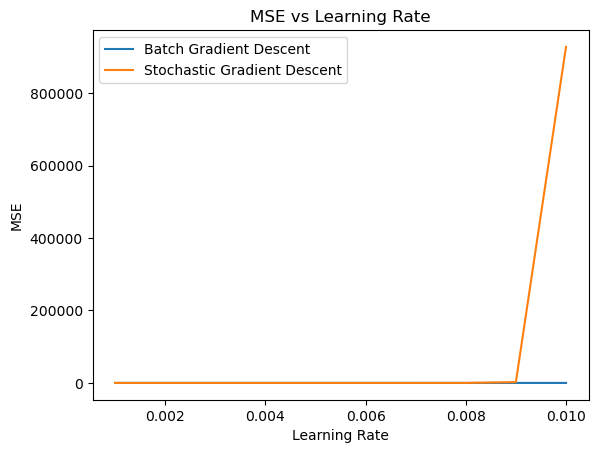

Best learning rate for Batch Gradient Descent: 0.01
Best learning rate for Stochastic Gradient Descent: 0.007


In [87]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
mse_learning_rates_batch = []
mse_learning_rates_stochastic = []

for lr in learning_rates:
    _, mse_batch_lr = batch_gradient_descent(X_train, y_train, lr, n_iterations)
    mse_learning_rates_batch.append(mse_batch_lr[-1])
    _, mse_stochastic_lr = stochastic_gradient_descent(X_train, y_train, lr, n_epochs)
    mse_learning_rates_stochastic.append(mse_stochastic_lr[-1])

plt.plot(learning_rates, mse_learning_rates_batch, label='Batch Gradient Descent')
plt.plot(learning_rates, mse_learning_rates_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Learning Rate')
plt.show()


best_lr_batch = learning_rates[np.argmin(mse_learning_rates_batch)]
best_lr_stochastic = learning_rates[np.argmin(mse_learning_rates_stochastic)]

print(f"Best learning rate for Batch Gradient Descent: {best_lr_batch}")
print(f"Best learning rate for Stochastic Gradient Descent: {best_lr_stochastic}")



The best learning rate for batch is .01, it converges fast. Although, the stochastic is approximately .007, as it is more variable. 